# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [5]:
# Your code here. 
student_data=pd.read_csv('student_data.csv')
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

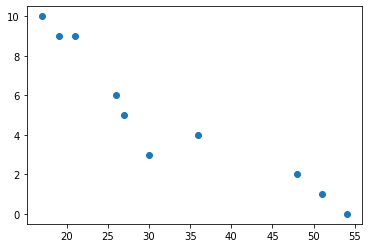

In [8]:
# Your code here.
plt.scatter(student_data['Age'],student_data['Tardies'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 

# Yes - it seems that there is a clear negative correlation between age and tardiness of students

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [17]:
# Your response here.
covariance=np.cov(student_data['Age'],student_data['Tardies'])[0,1]
corr=np.corrcoef(student_data['Age'],student_data['Tardies'])[0,1]
print(f"covariance is {covariance}, correlation is {corr}")

covariance is -45.56666666666666, correlation is -0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [20]:
# Your response here.
lr=LinearRegression()
lr.fit(student_data[['Age']],student_data['Tardies'])
coef=lr.coef_
inter=lr.intercept_

# outcome variables: coeficient and intercept
# I will use the linear regression

Plot your regression model on your scatter plot.

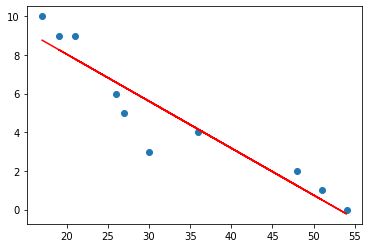

In [22]:
# Your code here.
X=student_data['Age']
y=student_data['Tardies']
line=inter+coef*X
plt.scatter(X,y)
plt.plot(X,line,color='r')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [28]:
# Your response here. 
results = smf.ols("Age ~ Tardies", data = student_data).fit()
results.summary()

C:\Users\vikto\anaconda3\envs\Ironhack\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           5.57e-05
Time:                        16:20:52   Log-Likelihood:                -29.149
No. Observations:                  10   AIC:                             62.30
Df Residuals:                       8   BIC:                             62.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.6988      2.791     18.168      0.000      44.264      57.134
Tardies       -3.6324      0.470     -7.734      0.000      -4.716      -2.549
==============================================================================
Omnibus:                        3.472   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                1.714
Skew:                          -1.010   Prob(JB):                        0.424
Kurtosis:                       2.812   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# We can say that based on the regression age is a good predictor of the tardines, as the R2 is quite high with 0.882

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [30]:
# Import any libraries you may need & the data
vehicles=pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [32]:
# Your response here. 
vehicles[['CO2 Emission Grams/Mile','Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']].corr()

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [41]:
# Your response here. 
vehicles.rename(columns={'CO2 Emission Grams/Mile':'CO2_Emission_Grams_Mile','Fuel Barrels/Year':'Fuel_Barrels_Year','Combined MPG':'Combined_MPG','Fuel Cost/Year':'Fuel_Cost_Year'},inplace=True)
results=smf.ols("CO2_Emission_Grams_Mile ~ Year + Cylinders + Fuel_Barrels_Year + Combined_MPG + Fuel_Cost_Year", data=vehicles).fit()

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                             16:46:49   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_Barrels_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost_Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 
# Hi there, I think the Fuel Barrels Per Year has the strongest influence on the CO2 emmissions as it has the highest t-test

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [43]:
# Your code here. 
df_parties=pd.read_csv('parties.csv')

In [44]:
df_parties

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

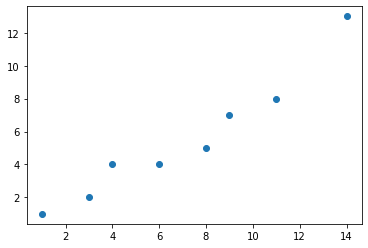

In [45]:
# Your code here.
plt.scatter(df_parties[['X']],df_parties['Y'])

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [46]:
# Your response here. 
results = smf.ols("X ~ Y", data = df_parties).fit()
results.summary()

C:\Users\vikto\anaconda3\envs\Ironhack\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           0.000102
Time:                        17:04:08   Log-Likelihood:                -11.831
No. Observations:                   8   AIC:                             27.66
Df Residuals:                       6   BIC:                             27.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9608      0.796      1.207      0.273      -0.987       2.909
Y              1.0980      0.121      9.045      0.000       0.801       1.395
==============================================================================
Omnibus:                        1.930   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                0.742
Skew:                           0.048   Prob(JB):                        0.690
Kurtosis:                       1.511   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 
# No it does not look like there are outliers, all values lie close to the line

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# No change ;)